# Barack Obama Stock Portfolio

During Obama Presidental, he was more focus on healthcare. 


https://en.wikipedia.org/wiki/Presidency_of_Barack_Obama

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY','XLV','JNJ','UNH', 'CSV']
start = '2009-01-01'
end = '2017-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  5 of 5 downloaded


,CSV,JNJ,SPY,UNH,XLV
Date,,,,,
2009-01-02,1.967300,43.715363,74.754257,23.687811,22.505955
2009-01-05,2.096000,43.282875,74.665771,23.301462,22.397955
2009-01-06,2.151160,43.023403,75.164375,22.751974,22.032404
2009-01-07,2.068423,42.619766,72.912735,22.580259,21.833021
2009-01-08,2.215511,42.540485,73.210289,22.932276,21.957638


In [3]:
df.tail()

,CSV,JNJ,SPY,UNH,XLV
Date,,,,,
2016-12-23,27.665680,107.763290,214.288986,156.429550,66.537178
2016-12-27,27.897112,107.716850,214.820618,156.055359,66.671288
2016-12-28,27.694609,106.964104,213.045227,154.903946,66.163589
2016-12-29,27.742821,107.326523,212.997772,154.520157,66.278542
2016-12-30,27.617464,107.066322,212.219269,153.560623,66.039070


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
8 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

8 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
CSV: 20000.0
JNJ: 20000.0
SPY: 20000.0
UNH: 20000.0
XLV: 20000.0


In [8]:
print('Number of Shares:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
CSV: 10166
JNJ: 457
SPY: 267
UNH: 844
XLV: 888


In [9]:
print('Beginning Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
CSV: $19999.57
JNJ: $19977.92
SPY: $19959.39
UNH: $19992.51
XLV: $19985.29


In [10]:
print('Current Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
CSV: $280759.14
JNJ: $48929.31
SPY: $56662.54
UNH: $129605.17
XLV: $58642.69


In [22]:
result = []
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $574598.85


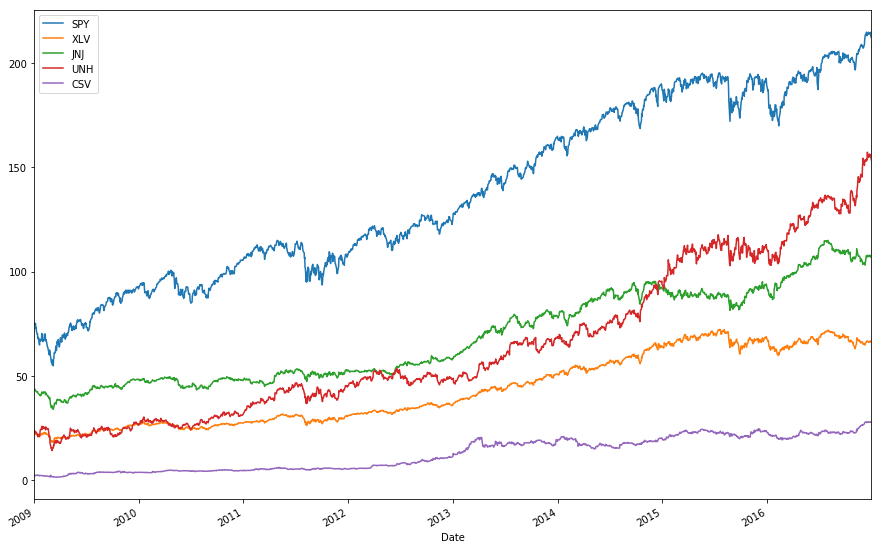

In [12]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.legend()

In [13]:
df.min()

CSV     1.296211
JNJ    33.866924
SPY    54.771000
UNH    14.037539
XLV    18.177565
dtype: float64

In [14]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 214.96817000000001
XLV: 72.23919699999999
JNJ: 114.969307
UNH: 157.30273400000002
CSV: 27.897112


In [15]:
# Creating a Return Data Frame for all individual banks stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,XLV Return,JNJ Return,UNH Return,CSV Return
Date,,,,,
2009-01-05,-0.001184,-0.004799,-0.009893,-0.016310,0.065420
2009-01-06,0.006678,-0.016321,-0.005995,-0.023582,0.026317
2009-01-07,-0.029956,-0.009050,-0.009382,-0.007547,-0.038462
2009-01-08,0.004081,0.005708,-0.001860,0.015590,0.071111


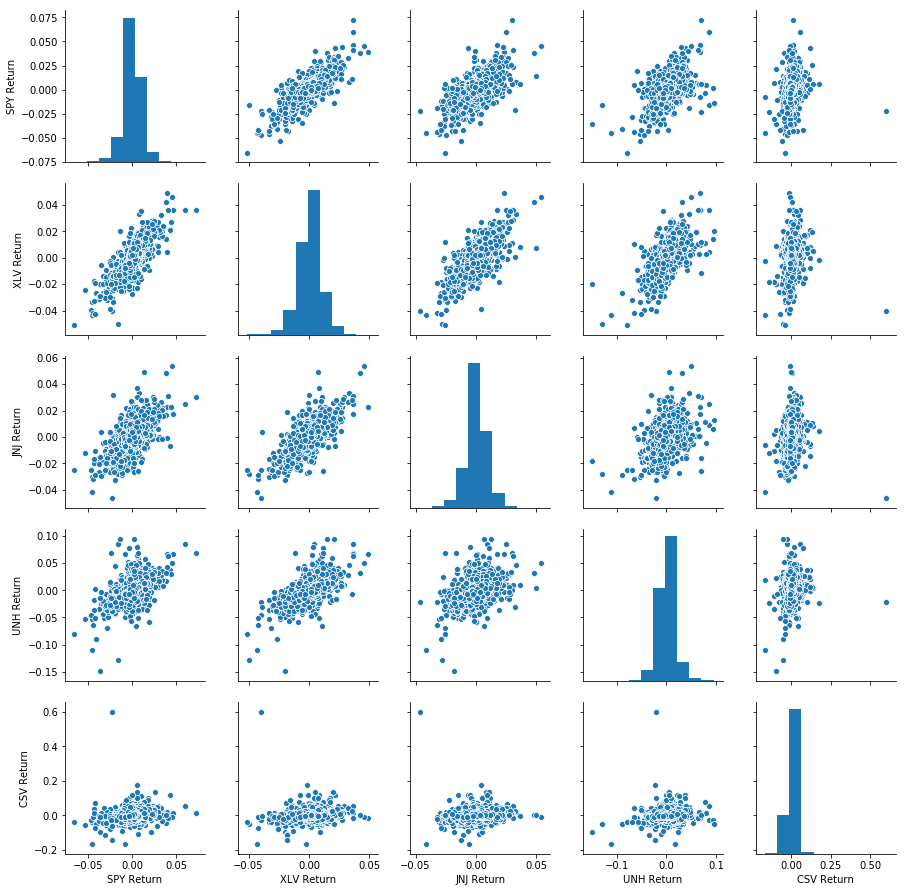

In [16]:
sns.pairplot(returns[1:] )

In [17]:
# dates each bank stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return   2009-03-23
XLV Return   2009-03-12
JNJ Return   2011-08-11
UNH Return   2009-05-07
CSV Return   2009-02-27
dtype: datetime64[ns]


In [18]:
# dates each bank stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return   2011-08-08
XLV Return   2011-08-08
JNJ Return   2009-02-27
UNH Return   2009-02-23
CSV Return   2009-03-03
dtype: datetime64[ns]


In [19]:
returns.corr()

,SPY Return,XLV Return,JNJ Return,UNH Return,CSV Return
SPY Return,1.000000,0.820935,0.661400,0.546607,0.251896
XLV Return,0.820935,1.000000,0.761999,0.640796,0.216553
JNJ Return,0.661400,0.761999,1.000000,0.431125,0.134011
UNH Return,0.546607,0.640796,0.431125,1.000000,0.183857
CSV Return,0.251896,0.216553,0.134011,0.183857,1.000000


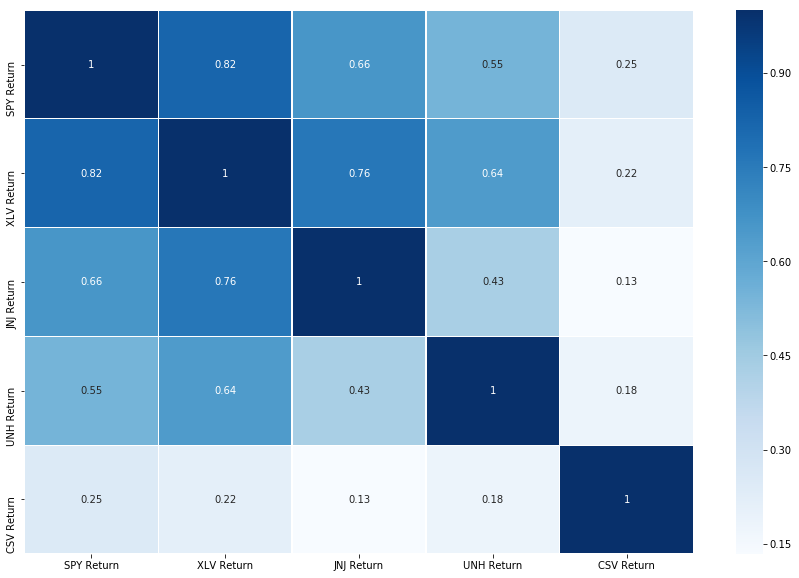

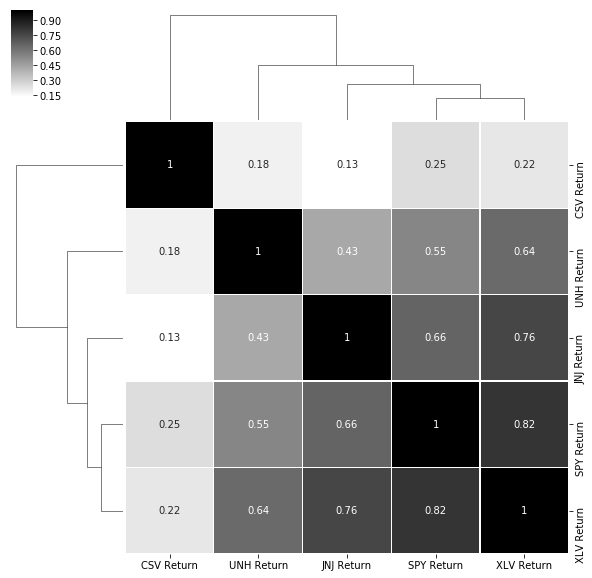

In [20]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

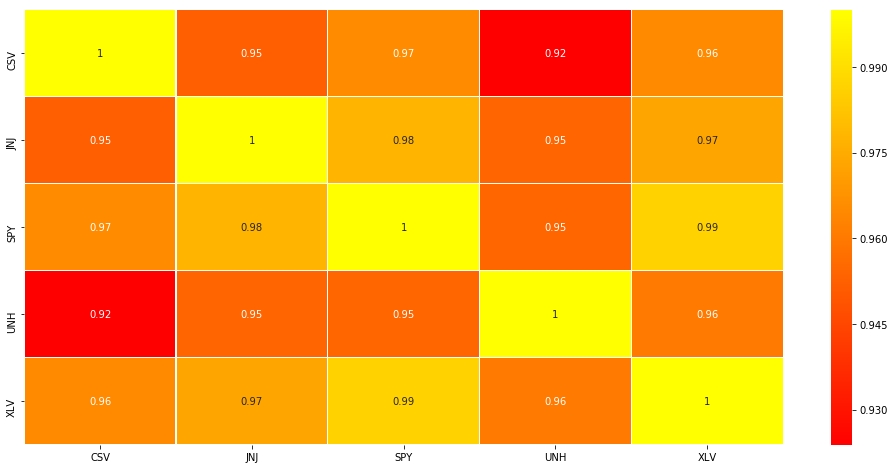

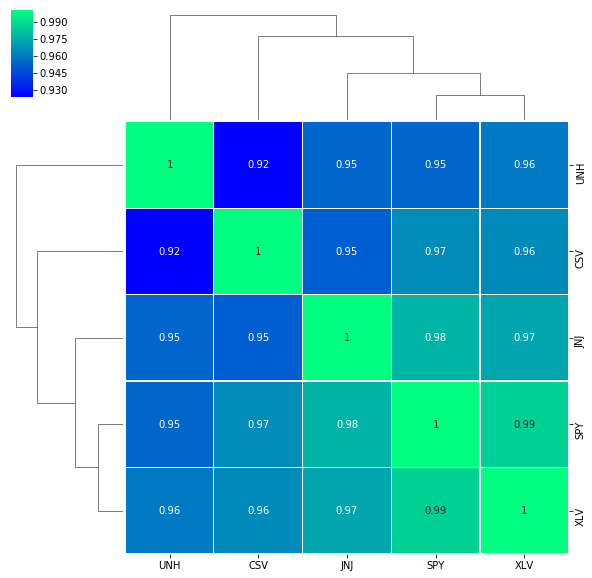

In [21]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)